# Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar_time_series import time_series
from ursar import visual, describe, model, scoring

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load dataset

In [8]:
df = pd.read_csv(f"E:/gitlab/dataset/time_series/bike_train.csv")

In [9]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [10]:
describe.describe_data(df)

'table size 10886 x 12'

Dataframe has 12 columns.
There are 12 columns that have missing values.


,index,Data Type,Count,Missing,% missing,Low value,Q1,Mean,Median,Q3,Hi value,Mode,Stddev,Skewness,Skewness note,Uniques
0,datetime,object,10886,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,10886
1,season,int64,10886,0,0.0,1.00,2.00,2.51,3.00,4.00,4.00,4.00,1.12,-0.01,Fairly Symmetric (Negative),4
2,holiday,int64,10886,0,0.0,0.00,0.00,0.03,0.00,0.00,1.00,0.00,0.17,5.66,Highly Positively Skewed,2
3,workingday,int64,10886,0,0.0,0.00,0.00,0.68,1.00,1.00,1.00,1.00,0.47,-0.78,Moderately Negatively Skewed,2
4,weather,int64,10886,0,0.0,1.00,1.00,1.42,1.00,2.00,4.00,1.00,0.63,1.24,Highly Positively Skewed,4
5,temp,float64,10886,0,0.0,0.82,13.94,20.23,20.50,26.24,41.00,14.76,7.79,0.00,Fairly Symmetric (Positive),49
6,atemp,float64,10886,0,0.0,0.76,16.66,23.66,24.24,31.06,45.45,31.06,8.47,-0.10,Fairly Symmetric (Negative),60
7,humidity,int64,10886,0,0.0,0.00,47.00,61.89,62.00,77.00,100.00,88.00,19.25,-0.09,Fairly Symmetric (Negative),89
8,windspeed,float64,10886,0,0.0,0.00,7.00,12.80,13.00,17.00,57.00,0.00,8.16,0.59,Moderately Positively Skewed,28
9,casual,int64,10886,0,0.0,0.00,4.00,36.02,17.00,49.00,367.00,0.00,49.96,2.50,Highly Positively Skewed,309


In [13]:
df = df.set_index('datetime')

In [14]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Time series

daily seasonal pattern with 2 peeks and a valley between them. 

Despite this pattern, there is still a lot of noise that is not explained by our daily seasonality so we will try to model this noise using other variables in the dataset and some feature engineering.

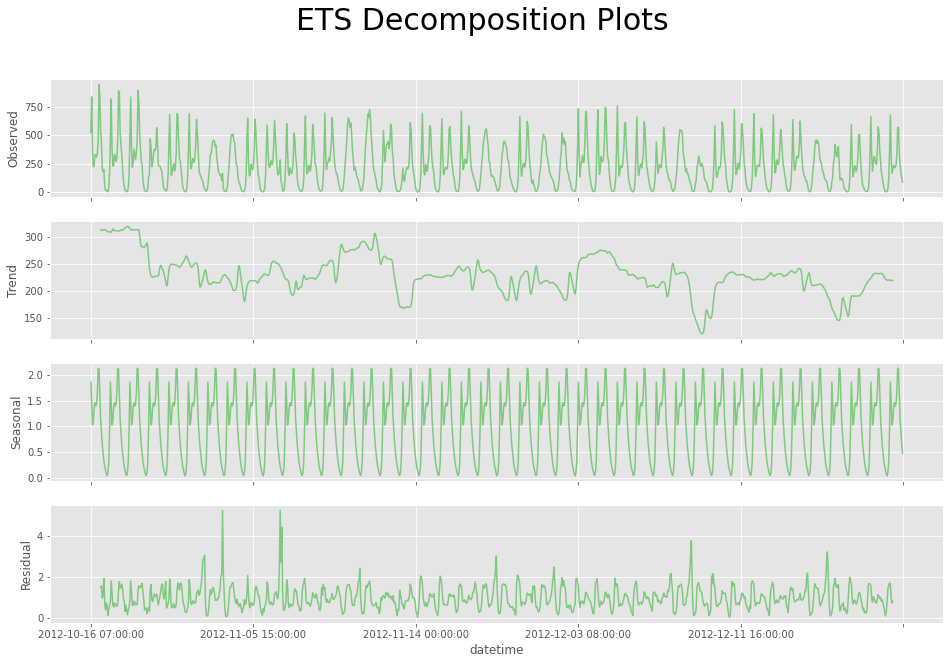

In [25]:
time_series.decomposition_plot(df.iloc[-1000:],'count','multiplicative',p=24)

After plotting this autocorrelation graph, we can say with a high confidence that our data is autoregressive and that we can improve our model’s performance using lags. In other words, the bike sharing demand can be explained using previous hour’s and day’s values.

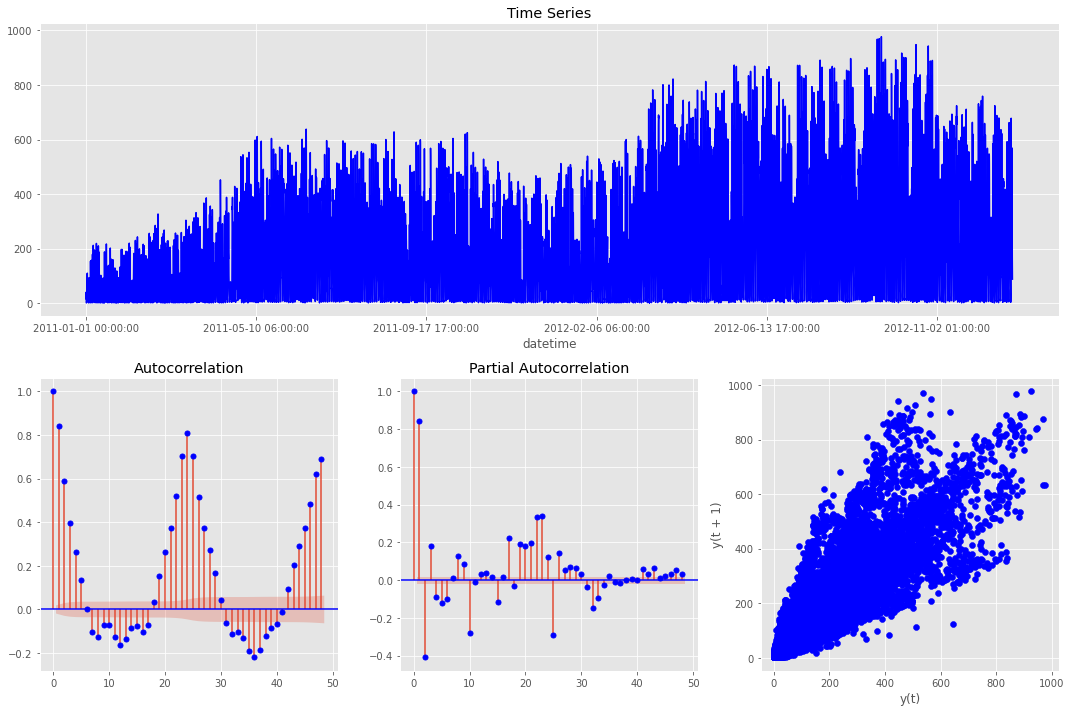

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10886
Model:                     ARMA(1, 0)   Log Likelihood              -65568.832
Method:                           mle   S.D. of innovations             99.903
Date:                Thu, 26 May 2022   AIC                         131141.663
Time:                        17:56:19   BIC                         131156.254
Sample:                             0   HQIC                        131146.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9253      0.004    254.943      0.000       0.918       0.932
                                    Roots                                    
                  Real          Imaginary           M

In [26]:
ar1 = time_series.autocorrelation_plot(df,'count',48)

In [27]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Regression

we are going to forecast 1 week bike sharing demand. This means that if a week has 7 days and every day has 24 hours, we are going to predict the bike sharing demand for the next 168 hours.

In [30]:
#drop datetime column
df.index = pd.to_datetime(df.index)

In [31]:
#create hour, day and month variables from datetime index
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month

In [32]:
#drop casual and registered columns
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [33]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


## split data

In [34]:
X = df.drop('count', axis=1)
y = df['count']

In [35]:
horizon=24*7
#take last week of the dataset for validation
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

# Modeling

In [37]:
list_model = ['xgb','lgmb']

In [44]:
models,names_model,probs_model,probs_dual_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,types='regression',list_model=list_model)

we have done with these models:
Xgboost
LightGBM


# Scoring


Mean Absolute Percentage Error (MAPE)               = 32.32 %
Symmetric mean absolute percentage error (SMAPE)    = 34.84963165263592 %
R2                                                  = 81.07 %
Adjusted R2                                         = 79.7365 %
Mean Absolute Error (MAE)                           = 53.79
Median Absolute Error (MAE)                         = 37.32
Mean Square Error (MSE)                             = 5440.86
Root Mean Absolute Error (RMAE)                     = 7.33
Root Mean Absolute Error (RMSE)                     = 73.76
Mean Absolute Scaled Error (MASE)                   = 0.82
Median absolute deviation                           = 49.27
Max Error                                           = 237.81
Explained Variance Score                            = 0.88


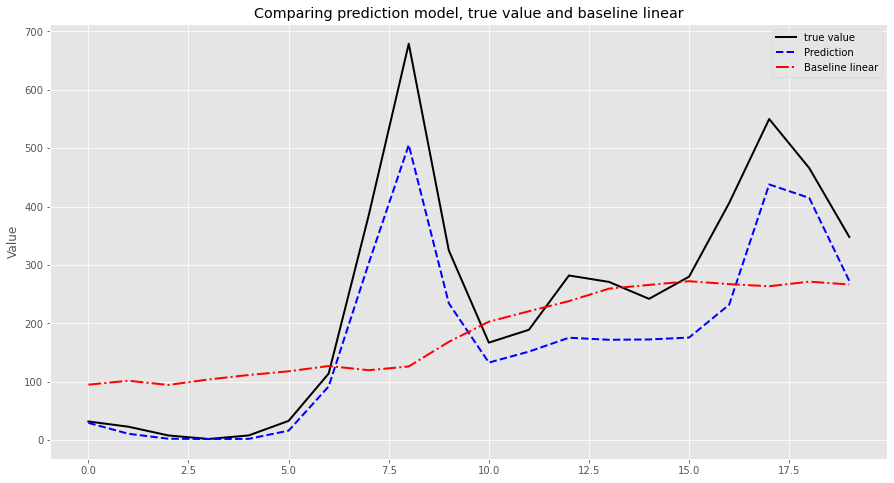

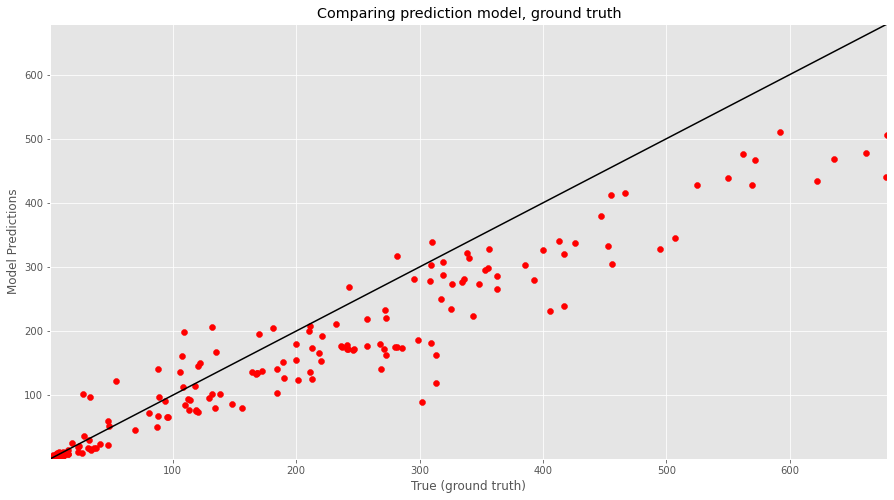


time span=  0:00:00.132645


In [48]:
scoring.print_score(y_test,pred_model[1],
                    types='regression',
                    time1=time_1[1],time2=time_2[1],
                    X_train=X_train, y_train=y_train,X_test=X_test)

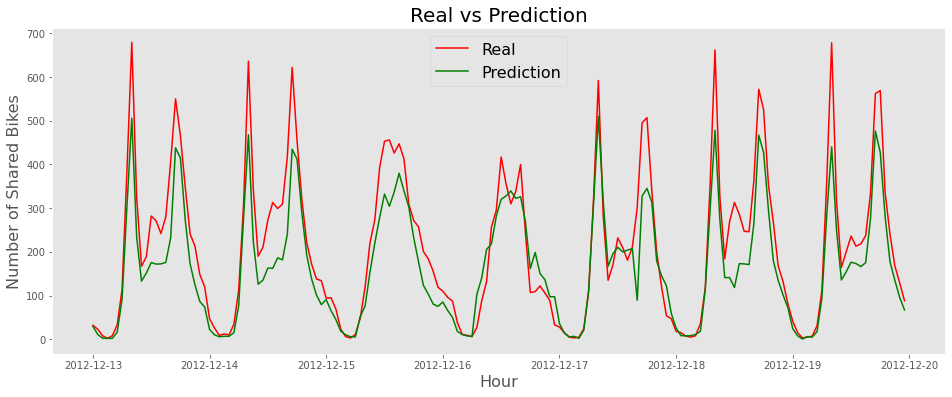

In [50]:
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(16,6))
plt.title(f'Real vs Prediction', fontsize=20)
plt.plot(y_test, color='red')
plt.plot(pd.Series(pred_model[1], index=y_test.index), color='green')
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Number of Shared Bikes', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

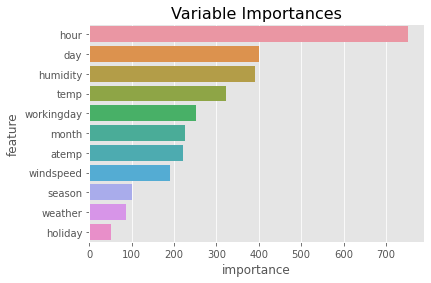

In [51]:
#create a dataframe with the variable importances of the model
df_importances = pd.DataFrame({
    'feature': models[1].feature_name_,
    'importance': models[1].feature_importances_
}).sort_values(by='importance', ascending=False)

#plot variable importances of the model
plt.title('Variable Importances', fontsize=16)
sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
plt.show()

# Train Model with Lags

the data seems to be very autocorrelated so let’s try adding lags and let’s see if this new feature improves the model’s performance

In [65]:
#create 1 week lag variable by shifting the target value for 1 week
df['count_prev_week_same_hour'] = df['count'].shift(24*7)

#drop NaNs after feature engineering
df.dropna(how='any', axis=0, inplace=True)

In [66]:
X = df.drop('count', axis=1)
y = df['count']

In [67]:
horizon=24*7
#take last week of the dataset for validation
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

In [68]:
models,names_model,probs_model,probs_dual_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,types='regression',list_model=list_model)

we have done with these models:
Xgboost
LightGBM



Mean Absolute Percentage Error (MAPE)               = 27.55 %
Symmetric mean absolute percentage error (SMAPE)    = 23.446996298028623 %
R2                                                  = 92.44 %
Adjusted R2                                         = 91.856 %
Mean Absolute Error (MAE)                           = 31.01
Median Absolute Error (MAE)                         = 21.22
Mean Square Error (MSE)                             = 2172.7
Root Mean Absolute Error (RMAE)                     = 5.57
Root Mean Absolute Error (RMSE)                     = 46.61
Mean Absolute Scaled Error (MASE)                   = 0.46
Median absolute deviation                           = 28.01
Max Error                                           = 229.55
Explained Variance Score                            = 0.94


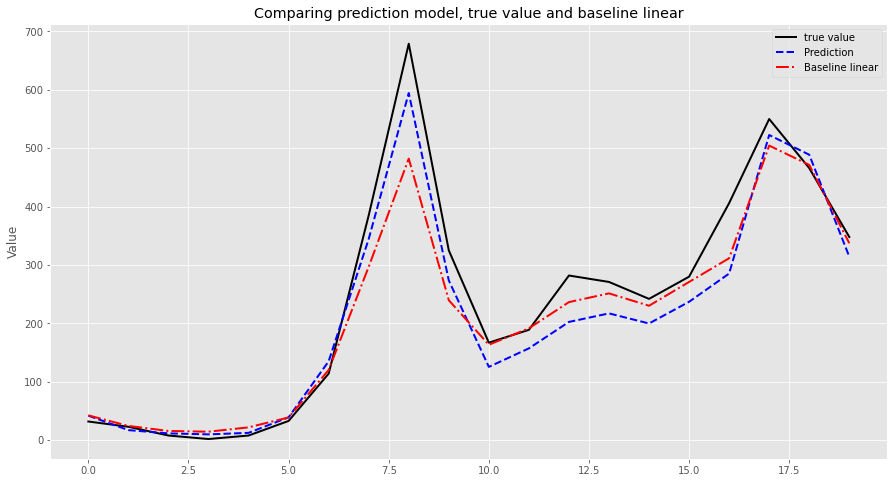

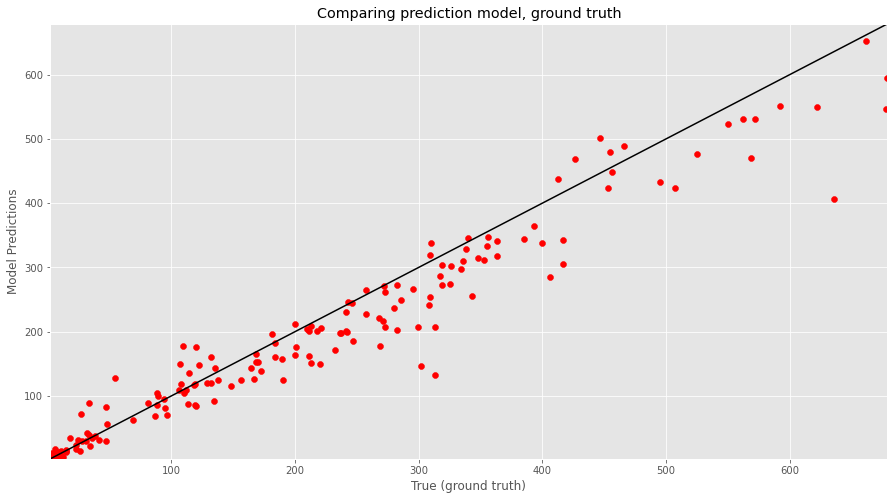


time span=  0:00:00.135636


In [69]:
scoring.print_score(y_test,pred_model[1],
                    types='regression',
                    time1=time_1[1],time2=time_2[1],
                    X_train=X_train, y_train=y_train,X_test=X_test)

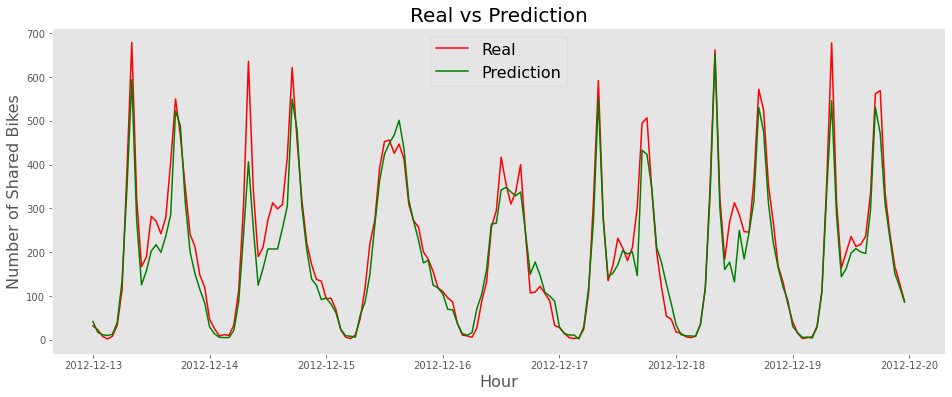

In [70]:
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(16,6))
plt.title(f'Real vs Prediction', fontsize=20)
plt.plot(y_test, color='red')
plt.plot(pd.Series(pred_model[1], index=y_test.index), color='green')
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Number of Shared Bikes', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

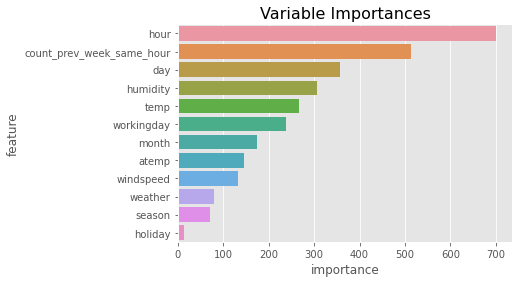

In [71]:
#create a dataframe with the variable importances of the model
df_importances = pd.DataFrame({
    'feature': models[1].feature_name_,
    'importance': models[1].feature_importances_
}).sort_values(by='importance', ascending=False)

#plot variable importances of the model
plt.title('Variable Importances', fontsize=16)
sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
plt.show()